# Mounting to Google Drive

In [2]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read the Excel file from Google Drive
path = '/content/drive/My Drive/hw3/extra_credits_dataset.xlsx'
df = pd.read_excel(path)

#df.head()


Mounted at /content/drive


# 1: Count of students who reported their "0.1 Extra Credit" bonus points

In [3]:
reported_students_count = df["Extra"].count()

reported_students_count


503

# 2: Calculating mean, min, and max of reported "0.1 Extra Credit" bonus points

In [4]:
mean_extra = df["Extra"].mean()
min_extra = df["Extra"].min()
max_extra = df["Extra"].max()

mean_extra, min_extra, max_extra


(0.7976540755467197, 0.1, 5.0)

# 3: Calculating percentage of students who reported no more than 1 point

In [5]:
students_less_than_one = df[df["Extra"] <= 1]["Extra"].count()
percentage_students_less_than_one = (students_less_than_one / reported_students_count) * 100

percentage_students_less_than_one


73.95626242544732

# 4: Calculating the correlation coefficient between extra credits and final score

In [6]:
correlation = df["Extra"].corr(df["Total"])

correlation_sign = "positive" if correlation > 0 else "negative"

correlation, correlation_sign


(0.1870606847002778, 'positive')

# 5: Scatter Plot

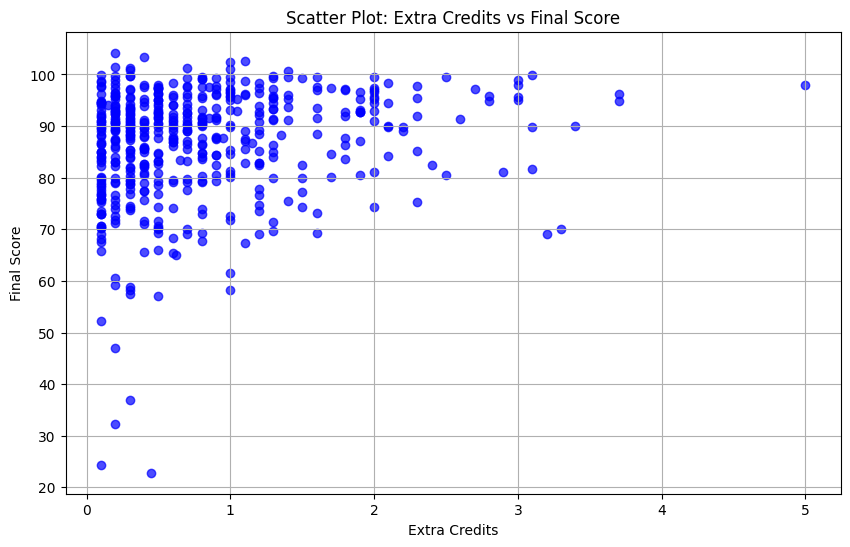

In [7]:
import matplotlib.pyplot as plt

# Plotting scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df["Extra"], df["Total"], color='blue', alpha=0.7)
plt.title("Scatter Plot: Extra Credits vs Final Score")
plt.xlabel("Extra Credits")
plt.ylabel("Final Score")
plt.grid(True)
plt.show()


# 6: Remove Missing Data & Apply Linear Regression Model

In [8]:
from sklearn.linear_model import LinearRegression

# Removing rows with missing data
df_cleaned = df.dropna()

# Preparing data for linear regression
X = df_cleaned[["Extra"]]
y = df_cleaned["Total"]

# Training a linear regression model
lr = LinearRegression()
lr.fit(X, y)

# Getting the slope (coefficient) and intercept of the regression line
slope = lr.coef_[0]
intercept = lr.intercept_

slope, intercept


(2.78665992618788, 84.54015334174261)

# 7: Calculate RMSE for the Linear Regression Model

In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predicting the final scores using the linear regression model
y_pred = lr.predict(X)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

rmse


10.711492451359439

# 8: Scatter Plot

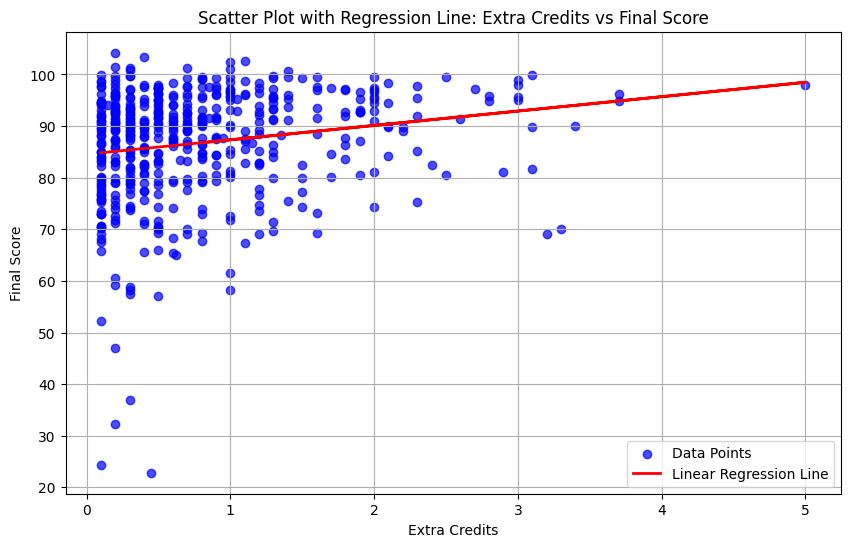

In [10]:
# Plotting scatter plot with regression line
plt.figure(figsize=(10,6))
plt.scatter(df_cleaned["Extra"], df_cleaned["Total"], color='blue', alpha=0.7, label="Data Points")
plt.plot(X, y_pred, color='red', linewidth=2, label="Linear Regression Line")
plt.title("Scatter Plot with Regression Line: Extra Credits vs Final Score")
plt.xlabel("Extra Credits")
plt.ylabel("Final Score")
plt.legend()
plt.grid(True)
plt.show()


# Saving answers in a doc file

In [14]:
from docx import Document
from docx.shared import Inches
import os

doc = Document()
doc.add_heading('Analysis Answers', level=1)

scatter_image_path = '/content/drive/My Drive/hw3/scatter_plot.png'
plt.figure(figsize=(10,6))
plt.scatter(df_cleaned["Extra"], df_cleaned["Total"], color='blue', alpha=0.7)
plt.title("Scatter Plot: Extra Credits vs Final Score")
plt.xlabel("Extra Credits")
plt.ylabel("Final Score")
plt.grid(True)
plt.savefig(scatter_image_path)
plt.close()

doc.add_paragraph(f"1. How many students reported their “0.1 Extra Credit” bonus points?\n   Answer: {reported_students_count} students reported their \"0.1 Extra Credit\" bonus points.\n")
doc.add_paragraph(f"2. What are the mean, the min, and the max of students’ reported “0.1 Extra Credit” bonus points?\n   Answer:\n   - Mean: {mean_extra:.3f}\n   - Min: {min_extra}\n   - Max: {max_extra}\n")
doc.add_paragraph(f"3. Among students who reported their extra credits, what is the percentage of the students who reported no more than 1 point?\n   Answer: {percentage_students_less_than_one}% of the students reported no more than 1 point.\n")
doc.add_paragraph(f"4. What is the correlation coefficient between students’ extra credits and their final score? Is correlation positive or negative?\n   Answer:\n   - Correlation coefficient: {correlation:.3f}\n   - The correlation is {correlation_sign}.\n")
doc.add_paragraph(f"5. Scatter plot showing the relationship between Extra Credits and Final Score:\n")
doc.add_picture(scatter_image_path, width=Inches(6))

regression_image_path = '/content/drive/My Drive/hw3/regression_plot.png'
plt.figure(figsize=(10,6))
plt.scatter(df_cleaned["Extra"], df_cleaned["Total"], color='blue', alpha=0.7, label="Data Points")
plt.plot(X, y_pred, color='red', linewidth=2, label="Linear Regression Line")
plt.title("Scatter Plot with Regression Line: Extra Credits vs Final Score")
plt.xlabel("Extra Credits")
plt.ylabel("Final Score")
plt.legend()
plt.grid(True)
plt.savefig(regression_image_path)
plt.close()

doc.add_paragraph(f"6. The linear equation that predicts a student's final score based on their extra credits:\n   Answer: Final Score = {slope:.2f} * Extra Credits + {intercept:.2f}\n")
doc.add_paragraph(f"7. What is the root mean square error (RMSE) of the prediction of the linear regression model when the model is applied to all data samples?\n   Answer: RMSE is {rmse:.2f}.\n")
doc.add_paragraph("8. Scatter Plot with Regression Line:")
doc.add_picture(regression_image_path, width=Inches(6))

# Save the document
doc_path = '/content/drive/My Drive/hw3/answers.docx'
doc.save(doc_path)

os.remove(scatter_image_path)
os.remove(regression_image_path)